<a href="https://colab.research.google.com/github/rdesarz/zoo/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Check for Tensorflow version
print(tf.__version__)

# Check if there is an existing GPU device
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.0
Found GPU at: /device:GPU:0


In [2]:
# We use the CIFAR-10 datasets for this example
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Processing function
def process_image(image, label):
  image=tf.image.per_image_standardization(image)
  # image=tf.image.resize(image,(64,64))

  return image, label

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

train_ds_size = tf.data.experimental.cardinality(train_dataset).numpy()
test_ds_size = tf.data.experimental.cardinality(test_dataset).numpy()

In [5]:
train_dataset=(train_dataset
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True))
test_dataset=(test_dataset
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True))

In [6]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 128, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 256, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.Conv2D(filters = 512, kernel_size=(3,3), activation="relu", 
                          padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,activation='softmax')  
])

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [8]:
history=model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset,
    validation_freq=1
)

Epoch 1/50
1562/1562 [==============================] - 120s 66ms/step - loss: 2.3020 - accuracy: 0.1100 - val_loss: 2.2998 - val_accuracy: 0.1199
Epoch 2/50
1562/1562 [==============================] - 108s 66ms/step - loss: 2.1755 - accuracy: 0.1897 - val_loss: 1.8752 - val_accuracy: 0.3054
Epoch 3/50
1562/1562 [==============================] - 108s 66ms/step - loss: 1.7619 - accuracy: 0.3340 - val_loss: 1.5890 - val_accuracy: 0.4014
Epoch 4/50
1562/1562 [==============================] - 107s 66ms/step - loss: 1.5533 - accuracy: 0.4217 - val_loss: 1.4083 - val_accuracy: 0.4780
Epoch 5/50
1562/1562 [==============================] - 108s 66ms/step - loss: 1.3676 - accuracy: 0.4993 - val_loss: 1.3480 - val_accuracy: 0.5133
Epoch 6/50
1562/1562 [==============================] - 108s 66ms/step - loss: 1.1876 - accuracy: 0.5703 - val_loss: 1.0935 - val_accuracy: 0.6033
Epoch 7/50
1562/1562 [==============================] - 108s 67ms/step - loss: 1.0364 - accuracy: 0.6289 - val_loss: 0

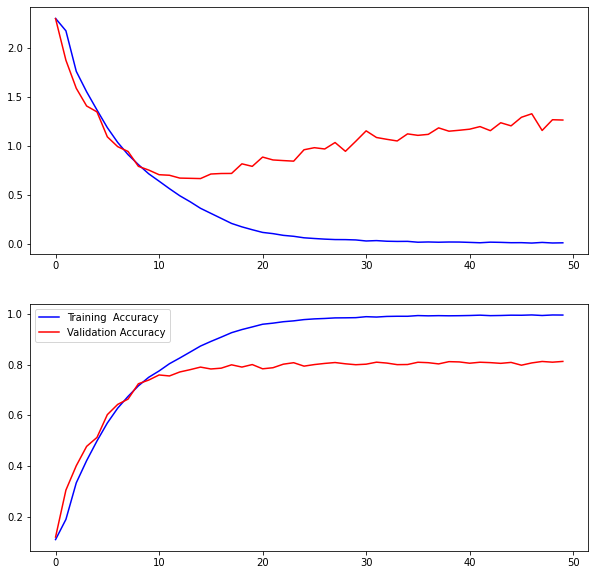

In [10]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()


In [12]:
import numpy as np

print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.8135015964508057
